In [4]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils
from keras.datasets import mnist

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
input_shape = (28, 28, 1)

In [8]:
x_train = x_train / 255
x_test = x_test / 255

In [9]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [20]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        Flatten(),
        Dense(128, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [21]:
%%time

history = model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_data=(x_test, y_test_cat), validation_split = 0.2)


Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2629 - accuracy: 0.9247 - val_loss: 0.1401 - val_accuracy: 0.9596
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1167 - accuracy: 0.9655 - val_loss: 0.1048 - val_accuracy: 0.9690
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0826 - accuracy: 0.9754 - val_loss: 0.0954 - val_accuracy: 0.9688
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0604 - accuracy: 0.9815 - val_loss: 0.0736 - val_accuracy: 0.9782
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0474 - accuracy: 0.9852 - val_loss: 0.0771 - val_accuracy: 0.9753
CPU times: total: 54.7 s
Wall time: 24.3 s


In [22]:
accur = model.evaluate(x_test, y_test_cat)
print(f' точность прогноза тестирования данных {round(accur[1] * 100, 4)}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.0771 - accuracy: 0.9753
 точность прогноза тестирования данных 97.53%


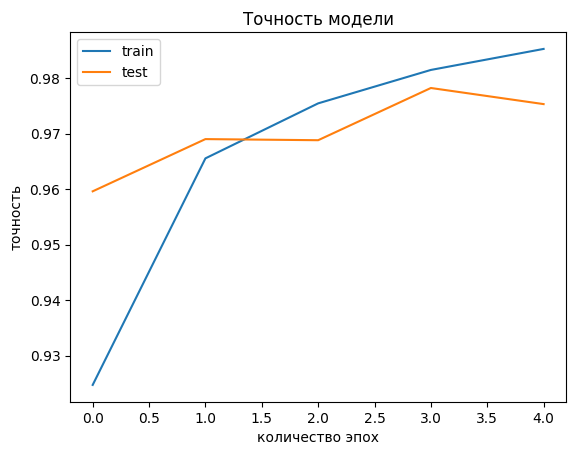

In [23]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Точность модели")
plt.ylabel("точность")
plt.xlabel("количество эпох")
plt.legend(["train", "test"], loc="upper left")
plt.show()

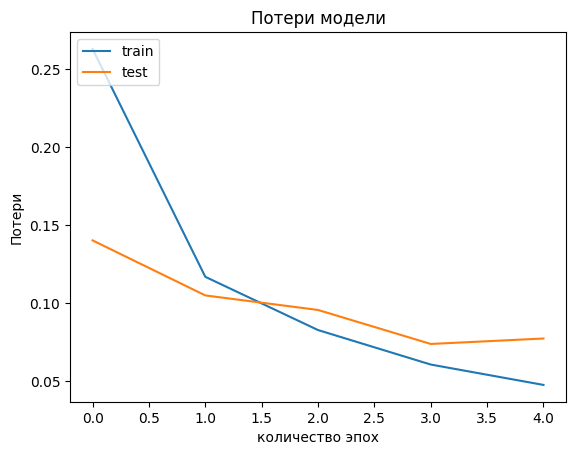

In [24]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Потери модели")
plt.ylabel("Потери")
plt.xlabel("количество эпох")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [27]:
from tensorflow.keras.preprocessing import image

img = image.load_img("./test_images_folder/5.png")
img = img.resize((28, 28))
img = img.convert("L")
img = np.array(img)
img = img.reshape(1, 28, 28)
img = img / 255.0
prediction = model.predict(img)
prediction = np.argmax(prediction)
print("цифра:", prediction)

1/1 [==============================] - 0s 120ms/step
цифра: 5
